In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# not neccessary at the current time 
#akasdf = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
#ratingsdf = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
#movieinfodf = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep='\t')
#tmdbdf = pd.read_csv('data/zippedData/tmdb.movies.csv.gz', index_col=0)
#reviewsdf = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
#I don't really know what this encoding parameter is doing but I got it to open the data!


In [3]:
grossdf = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
namesdf = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
titlesdf = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
crewdf = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
principalsdf = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
budgetdf = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


In [4]:
#grabbing the relevant columns from the titles dataframe that I want to merge into my budget dataframe
genres = titlesdf[['primary_title', 'genres']]

I've located the top net grossing films and now want to figure out why they are so successful

In [5]:
#highest grossing movies
#removed the commas and dollar signs from the data so that it could be converted
#reassigned the data to a float type instead of object so that it may be sorted properly
#assinged that now to an int so that it is easier to read
#since I'm on a PC for some reason I cannot just convert to int
#only selected the movies from the past 20 years
#established a column for net gross by subtracting the budget from the worldwide gross
#merged in my genres so that I may only select action movies
#selected the top 20 grossing action movies from the past 20 years
budgetdf.replace(',','', regex=True, inplace=True)
budgetdf.replace('\$','', regex=True, inplace=True)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(float)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(float)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(float)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(int)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(int)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(int)
budgetdf['release_date'] = pd.to_datetime(budgetdf['release_date'])
budgetdf = budgetdf[budgetdf['release_date'].dt.year >= 2001]
budgetdf['total_profit'] = budgetdf['worldwide_gross'] - budgetdf['production_budget']
budgetandgenres = budgetdf.merge(genres, left_on=['movie'], right_on=['primary_title'])
actiondf = budgetandgenres[budgetandgenres['genres'].str.contains('Action') == True]
highestactiondf = actiondf.sort_values(by='total_profit', ascending=False)
highest20df = highestactiondf.head(20)
highest20df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title,genres
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
24,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,"Action,Adventure,Sci-Fi"
58,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,Furious 7,"Action,Crime,Thriller"
19,27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,The Avengers,"Action,Adventure,Sci-Fi"
38,42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,Black Panther,"Action,Adventure,Sci-Fi"
102,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
39,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,1042520711,Incredibles 2,"Action,Adventure,Animation"
43,48,2013-05-03,Iron Man 3,200000000,408992272,1215392272,1015392272,Iron Man 3,"Action,Adventure,Sci-Fi"
124,36,2018-12-21,Aquaman,160000000,335061807,1146894640,986894640,Aquaman,"Action,Adventure,Fantasy"


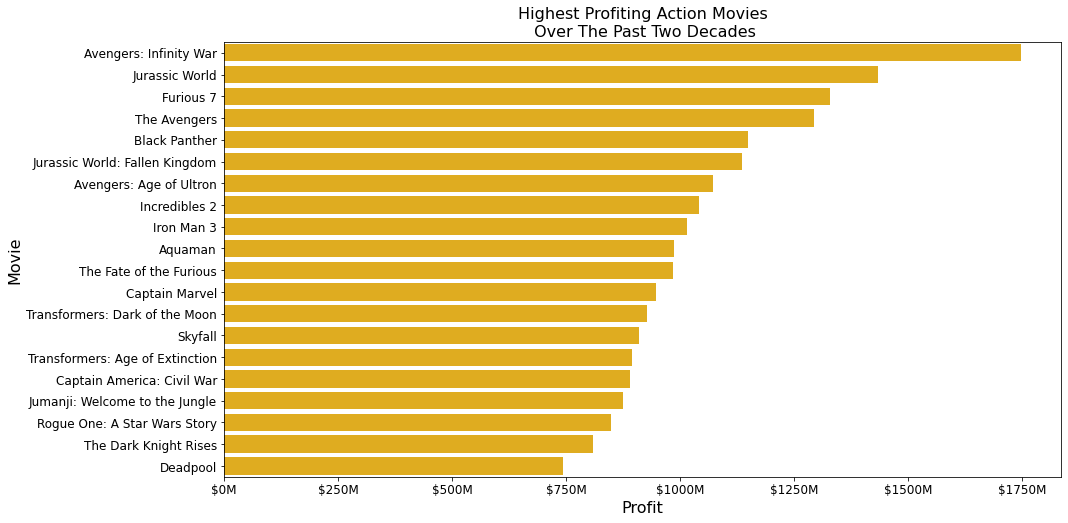

In [6]:
from matplotlib.ticker import FuncFormatter
def millions(y, pos):
    return '$%1.0fM' % (y*1e-6)

stevenmoviefig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = highest20df['movie'], x = highest20df['total_profit'], color='#ffbb00')
ax.set_title('Highest Profiting Action Movies\n Over The Past Two Decades', fontsize= 16)
ax.set_xlabel('Profit', fontsize= 16)
ax.set_ylabel('Movie', fontsize= 16)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('stevenmoviefig.jpg', dpi=300, bbox_inches='tight');

In [7]:
namesdf

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [8]:
#grabbing the columns that I need
names = namesdf[['nconst','primary_name']]

In [9]:
#checking for null values
names.isnull().sum()

nconst          0
primary_name    0
dtype: int64

In [10]:
names

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [11]:
#I do the same for the rest of the databases I wish to merge
titlesdf.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
movietitles = titlesdf[['tconst','primary_title']]

In [13]:
movietitles.isnull().sum()

tconst           0
primary_title    0
dtype: int64

In [14]:
movietitles

,tconst,primary_title
0,tt0063540,Sunghursh
1,tt0066787,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera
...,...,...
146139,tt9916538,Kuambil Lagi Hatiku
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro
146141,tt9916706,Dankyavar Danka
146142,tt9916730,6 Gunn


In [15]:
principalsdf.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [16]:
crew = principalsdf[['tconst','nconst','category']]

In [17]:
crew.isnull().sum()

tconst      0
nconst      0
category    0
dtype: int64

In [18]:
crew

,tconst,nconst,category
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress
...,...,...,...
1028181,tt9692684,nm0186469,actor
1028182,tt9692684,nm4929530,self
1028183,tt9692684,nm10441594,director
1028184,tt9692684,nm6009913,writer


In [19]:
# Adding the names dataframe to principals
crewnames = names.merge(crew, on=['nconst'])
# Adding the titles 
namesandtitles = crewnames.merge(movietitles, on=['tconst'])
# Adding all that to the budget datafram
grosscrew = namesandtitles.merge(highestactiondf, left_on=['primary_title'], right_on=['movie'])


In [20]:
#Here it is!
grosscrew

,nconst,primary_name,tconst,category,primary_title_x,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title_y,genres
0,nm0093589,Matt Bomer,tt3799694,actor,The Nice Guys,56,2016-05-20,The Nice Guys,50000000,36261763,59596747,9596747,The Nice Guys,"Action,Comedy,Crime"
1,nm0000948,Shane Black,tt3799694,director,The Nice Guys,56,2016-05-20,The Nice Guys,50000000,36261763,59596747,9596747,The Nice Guys,"Action,Comedy,Crime"
2,nm0331516,Ryan Gosling,tt3799694,actor,The Nice Guys,56,2016-05-20,The Nice Guys,50000000,36261763,59596747,9596747,The Nice Guys,"Action,Comedy,Crime"
3,nm0000128,Russell Crowe,tt3799694,actor,The Nice Guys,56,2016-05-20,The Nice Guys,50000000,36261763,59596747,9596747,The Nice Guys,"Action,Comedy,Crime"
4,nm0005428,Joel Silver,tt3799694,producer,The Nice Guys,56,2016-05-20,The Nice Guys,50000000,36261763,59596747,9596747,The Nice Guys,"Action,Comedy,Crime"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207,nm6825014,Gabriel Michael,tt5521836,actor,Panic Room,17,2002-03-29,Panic Room,48000000,95308367,196308367,148308367,Panic Room,"Action,Drama,Mystery"
11208,nm7973173,Ben Yonko,tt5521836,actor,Panic Room,17,2002-03-29,Panic Room,48000000,95308367,196308367,148308367,Panic Room,"Action,Drama,Mystery"
11209,nm6825011,G.M. Whiting,tt5521836,director,Panic Room,17,2002-03-29,Panic Room,48000000,95308367,196308367,148308367,Panic Room,"Action,Drama,Mystery"
11210,nm7572519,Emma Meyer,tt5521836,actor,Panic Room,17,2002-03-29,Panic Room,48000000,95308367,196308367,148308367,Panic Room,"Action,Drama,Mystery"


In [21]:
#Copying the dataframe into a sorted by the highest worldwide gross
highestgrosscrew = grosscrew.sort_values(by='total_profit', ascending=False)

In [22]:
highestgrosscrew

,nconst,primary_name,tconst,category,primary_title_x,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title_y,genres
3735,nm1165110,Chris Hemsworth,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3732,nm0751648,Joe Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3734,nm0749263,Mark Ruffalo,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3736,nm0751577,Anthony Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3737,nm0262635,Chris Evans,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,nm0126208,John Byrne,tt6565702,writer,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"
9858,nm1055413,Michael Fassbender,tt6565702,actor,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"
9859,nm2225369,Jennifer Lawrence,tt6565702,actress,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"
9860,nm1334526,Simon Kinberg,tt6565702,director,Dark Phoenix,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,"Action,Adventure,Sci-Fi"


In [23]:
directors = highestgrosscrew.loc[highestgrosscrew['category'] == 'director']

In [24]:
directors.head()

,nconst,primary_name,tconst,category,primary_title_x,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title_y,genres
3732,nm0751648,Joe Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3736,nm0751577,Anthony Russo,tt4154756,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
2436,nm1119880,Colin Trevorrow,tt0369610,director,Jurassic World,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,"Action,Adventure,Sci-Fi"
3623,nm1490123,James Wan,tt2820852,director,Furious 7,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,Furious 7,"Action,Crime,Thriller"
5721,nm0923736,Joss Whedon,tt0848228,director,The Avengers,27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,The Avengers,"Action,Adventure,Sci-Fi"


In [25]:
#I want to treat the Russo Brothers as one since their data is the same and they work as a pair
#To do so I rename them as The Russo Brothers in my dataframe and drop the name and title constant columns so that
#I can also drop the duplicate values
directors.replace('Joe Russo','The Russo Brothers', regex=True, inplace=True)
directors.replace('Anthony Russo','The Russo Brothers', regex=True, inplace=True)
directors = directors.drop(['nconst', 'tconst'], axis=1)
directors = directors.drop_duplicates()

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [26]:
directors.head()

,primary_name,category,primary_title_x,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title_y,genres
3732,The Russo Brothers,director,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
2436,Colin Trevorrow,director,Jurassic World,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,"Action,Adventure,Sci-Fi"
3623,James Wan,director,Furious 7,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,Furious 7,"Action,Crime,Thriller"
5721,Joss Whedon,director,The Avengers,27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,The Avengers,"Action,Adventure,Sci-Fi"
9820,Ryan Coogler,director,Black Panther,42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,Black Panther,"Action,Adventure,Sci-Fi"


In [27]:
directorgb = directors.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)

In [28]:
directorgb.head(10)

,id,production_budget,domestic_gross,worldwide_gross,total_profit
primary_name,,,,,
The Russo Brothers,40,720000000.0,1.346647e+09,3.902606e+09,3.182606e+09
Joss Whedon,31,555600000.0,1.082285e+09,2.920950e+09,2.365350e+09
James Wan,103,350000000.0,6.880688e+08,2.665617e+09,2.315617e+09
Michael Bay,167,648000000.0,7.778736e+08,2.911998e+09,2.263998e+09
Francis Lawrence,191,484000000.0,1.090402e+09,2.426382e+09,1.942382e+09
Christopher Nolan,118,585000000.0,9.307836e+08,2.419801e+09,1.834801e+09
Sam Mendes,62,500000000.0,5.044345e+08,1.990148e+09,1.490148e+09
Zack Snyder,208,950000000.0,9.424978e+08,2.420920e+09,1.470920e+09
Colin Trevorrow,34,215000000.0,6.522706e+08,1.648855e+09,1.433855e+09


In [29]:
top10directors = directorgb.head(10)

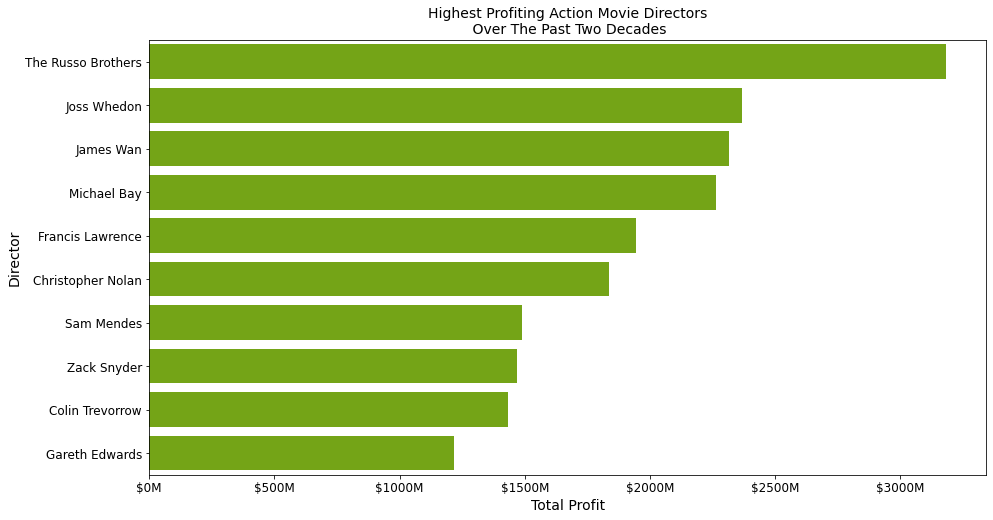

In [30]:
stevendirectorfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10directors.index, x = top10directors['total_profit'], color='#7cbb00')
ax.set_title('Highest Profiting Action Movie Directors\n Over The Past Two Decades', fontsize= 14)
ax.set_xlabel('Total Profit', fontsize= 14)
ax.set_ylabel('Director', fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('stevendirectorfig.jpg', dpi=300, bbox_inches='tight');


In [33]:
# I repeat the process for Actors and Actresses

In [31]:
actors = highestgrosscrew.loc[highestgrosscrew['category'] == 'actor']

In [32]:
actors.head()

,nconst,primary_name,tconst,category,primary_title_x,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title_y,genres
3735,nm1165110,Chris Hemsworth,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3734,nm0749263,Mark Ruffalo,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3737,nm0262635,Chris Evans,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
3739,nm0000375,Robert Downey Jr.,tt4154756,actor,Avengers: Infinity War,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
2433,nm0695435,Chris Pratt,tt0369610,actor,Jurassic World,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,"Action,Adventure,Sci-Fi"


In [33]:
actorgb = actors.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)

In [34]:
top10actors = actorgb.head(10)

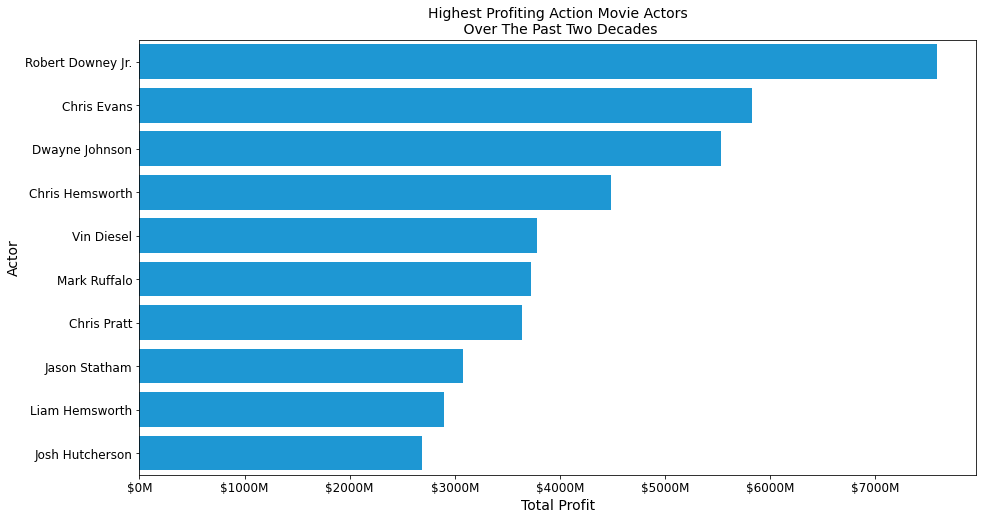

In [43]:
stevenactorfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10actors.index, x = top10actors['total_profit'], color='#00a1f1')

ax.set_title('Highest Profiting Action Movie Actors\n Over The Past Two Decades',fontsize= 14)
ax.set_xlabel('Total Profit',fontsize= 14)
ax.set_ylabel('Actor',fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('stevenactorfig.jpg', dpi=300, bbox_inches='tight');

In [44]:
actresses = highestgrosscrew.loc[highestgrosscrew['category'] == 'actress']

In [45]:
actresses.head(10)

,nconst,primary_name,tconst,category,primary_title_x,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,primary_title_y,genres
2434,nm0397171,Bryce Dallas Howard,tt0369610,actress,Jurassic World,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,"Action,Adventure,Sci-Fi"
2432,nm0339460,Judy Greer,tt0369610,actress,Jurassic World,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,"Action,Adventure,Sci-Fi"
5714,nm0424060,Scarlett Johansson,tt0848228,actress,The Avengers,27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,The Avengers,"Action,Adventure,Sci-Fi"
9819,nm1775091,Danai Gurira,tt1825683,actress,Black Panther,42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,Black Panther,"Action,Adventure,Sci-Fi"
9817,nm2143282,Lupita Nyong'o,tt1825683,actress,Black Panther,42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,Black Panther,"Action,Adventure,Sci-Fi"
2443,nm0397171,Bryce Dallas Howard,tt4881806,actress,Jurassic World: Fallen Kingdom,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi"
3814,nm1102970,Sarah Vowell,tt3606756,actress,Incredibles 2,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,1042520711,Incredibles 2,"Action,Adventure,Animation"
3811,nm0000456,Holly Hunter,tt3606756,actress,Incredibles 2,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,1042520711,Incredibles 2,"Action,Adventure,Animation"
9334,nm0000569,Gwyneth Paltrow,tt1300854,actress,Iron Man 3,48,2013-05-03,Iron Man 3,200000000,408992272,1215392272,1015392272,Iron Man 3,"Action,Adventure,Sci-Fi"
7655,nm1720028,Amber Heard,tt1477834,actress,Aquaman,36,2018-12-21,Aquaman,160000000,335061807,1146894640,986894640,Aquaman,"Action,Adventure,Fantasy"


In [46]:
actressesgb = actresses.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)

In [47]:
top10actresses = actressesgb.head(10)

In [48]:
top10actresses

,id,production_budget,domestic_gross,worldwide_gross,total_profit
primary_name,,,,,
Scarlett Johansson,183,7.950000e+08,1.458248e+09,3.997826e+09,3.202826e+09
Jennifer Lawrence,367,1.252000e+09,1.843026e+09,4.152013e+09,2.900013e+09
Bryce Dallas Howard,47,3.850000e+08,1.069990e+09,2.954628e+09,2.569628e+09
Cate Blanchett,443,1.720000e+09,1.238359e+09,3.674994e+09,1.954994e+09
Angelina Jolie,304,7.000000e+08,7.361275e+08,2.510355e+09,1.810355e+09
Emma Stone,117,6.150000e+08,6.980539e+08,2.144056e+09,1.529056e+09
Gwyneth Paltrow,182,4.900000e+08,8.047798e+08,2.004496e+09,1.514496e+09
Brie Larson,326,4.370000e+08,7.685067e+08,1.929458e+09,1.492458e+09
Judy Greer,34,2.150000e+08,6.522706e+08,1.648855e+09,1.433855e+09


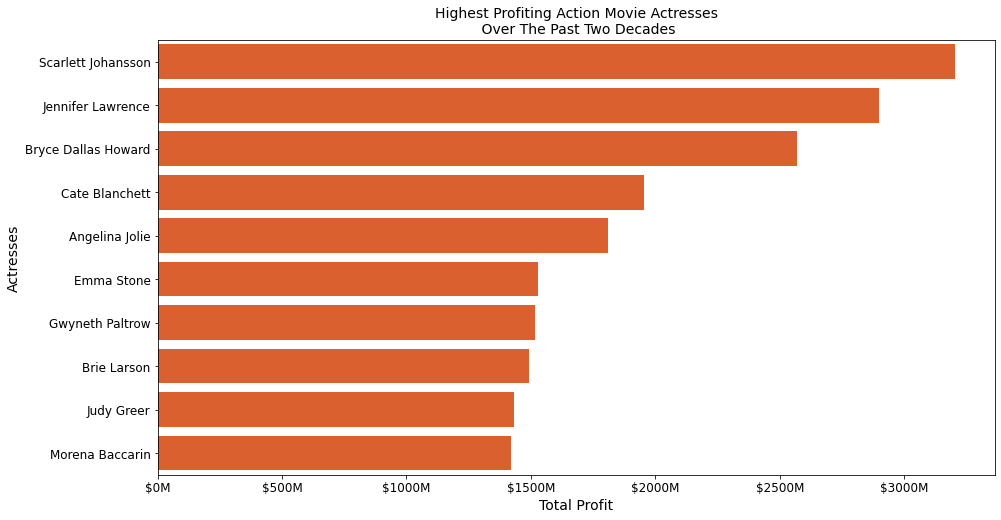

In [42]:
stevenactressfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10actresses.index, x = top10actresses['total_profit'], color='#f65314')
ax.set_title('Highest Profiting Action Movie Actresses\n Over The Past Two Decades',fontsize= 14)
ax.set_xlabel('Total Profit',fontsize= 14)
ax.set_ylabel('Actresses',fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('stevenactressfig.jpg', dpi=300, bbox_inches='tight');